### **INDEX**
1. Setup notebook
2. Research questions
3. Import data
4. Data wrangling & cleaning
5. Geospatial analysis
6. Research findings

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **1. SETUP NOTEBOOK**

In [4]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import folium
import json
import os
from pathlib import Path
from IPython.display import display, HTML
import branca.colormap

In [5]:
# get the current working directory as a Path object
path = os.getcwd()

# update the path to parent folder
path = os.path.abspath(os.path.join(path, os.pardir))

In [6]:
# activate inline matplotlib visuals 
%matplotlib inline

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **2. RESEARCH QUESTIONS**

**DESCRIPTIVE ANALYSIS QUESTIONS**
Trends:
- Retail price over the past 18 years: How has the average retail price changed over time?
- Use of color over time: What are the most frequently used colors, and how has their use changed? 
- The rise of licensed sets: How have licensed sets increased over time, and how do they compare to non-licensed sets?

Correlations:
- Number of instructions vs. themes: Do certain themes have more instructions, and how do they vary across themes?

**DIAGNOSTIC ANALYSIS QUESTIONS**
- Color and theme relationship: How are different colors used across themes, and do some themes favor certain colors?
- Retail price drivers: What factors contribute to higher retail prices (e.g., theme, pieces, licensed status)?
- Theme popularity across time: How have themes shifted in popularity over the years? Are certain themes seasonal or long-lasting?

**RELEVANT FINDINGS IN CORR**
- There is no fixed ratio minifigs:pieces per set. Further exploration could be by theme.
- Sets with the most pieces are wanted the most. 
- Larger sets are less colorful and have fewer minifigs.
- Sets with more colors are higher rated. 
- Most people own sets with only a few colors.
- Larger sets that are less colorful are both owned and wanted most. (Potential caveat: people who mark their ownership on fan sites are not your ordinary lego owner, rather collectors)
- Smaller sets get more diverse ratings, but larger sets receive high ratings.

  **NEW HYPOS**
- LEGO still targets the same audience since 1980, growing with their interest and budget as they age.
- LEGO sets that are movie franchises contain more minifigs.
- Minifigs do not influence desirability.
- Sets with more minifigs get higher ratings.
- More is more: the ratings of sets go up when the number of minifigs AND set size increase

**INVESTIGATE BACKLOG**
- Which LEGO sets of the larger type (500-1000 and 200-500 pieces) are in the lowest price ranges <50 USD?
- Get clarity on the behavior / patterns around the largest type of LEGO sets.

**GEOSPATIAL QUESTIONS**
- Set availability by region: How do retail prices and availability vary between different regions (US, UK, CA, DE)?
- Most popular themes: Which themes have been the most popular in terms of set releases or sales?

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **3. IMPORT DATA**

In [12]:
# get the current working directory as a Path object
path = Path.cwd()

# update the path to parent folder
parent_path = path.parent

In [13]:
# get geo json files from working directory as a Path object
markets_object = parent_path / '2 Data' / 'Original Data' / 'markets.geo.json'

# read content of JSON file and return it as a string
markets_string = markets_object.read_text()

#passing string and return it as a Python dictionary
markets_map = json.loads( markets_string)

#yterating through the json list
for feature in markets_map['features']:
    print(markets_map)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'featurecla': 'Admin-0 country', 'scalerank': 1, 'labelrank': 3, 'sovereignt': 'Poland', 'sov_a3': 'POL', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'tlc': '1', 'admin': 'Poland', 'adm0_a3': 'POL', 'geou_dif': 0, 'geounit': 'Poland', 'gu_a3': 'POL', 'su_dif': 0, 'subunit': 'Poland', 'su_a3': 'POL', 'brk_diff': 0, 'name': 'Poland', 'name_long': 'Poland', 'brk_a3': 'POL', 'brk_name': 'Poland', 'brk_group': None, 'abbrev': 'Pol.', 'postal': 'PL', 'formal_en': 'Republic of Poland', 'formal_fr': None, 'name_ciawf': 'Poland', 'note_adm0': None, 'note_brk': None, 'name_sort': 'Poland', 'name_alt': None, 'mapcolor7': 3, 'mapcolor8': 7, 'mapcolor9': 1, 'mapcolor13': 2, 'pop_est': 37970874, 'pop_rank': 15, 'pop_year': 2019, 'gdp_md': 595858, 'gdp_year': 2019, 'economy': '2. Developed region: nonG7', 'income_grp': '1. High income: OECD', 'fips_10': 'PL', 'iso_a2': 'PL', 'iso_a2_eh': 'PL', 'iso_a3': 'POL', '

In [14]:
# import lego data set
csv_file_path = parent_path / '2 Data' / 'Prepared data' / 'lego_analysis.csv'

# import data as datafram
df_lego_analysis = pd.read_csv(csv_file_path)

In [15]:
df_lego_analysis.head()

,Unnamed: 0,set_number,setID,name,year,theme,themeGroup,subtheme,category,pieces,...,status,year_time,year_period,inventory_id,set_num,theme_id,num_parts,num_colors,num_materials,sum_spares
0,0,10312-1,34386,Jazz Club,2023,Icons,Model making,Modular Buildings Collection,Normal,2899.0,...,Available now,2023-01-01,2023,152788,10312-1,155.0,2900.0,40.0,1.0,745.0
1,1,71038-7,34527,Queen of Hearts,2023,Collectable Minifigures,Miscellaneous,Disney 100,Normal,8.0,...,Available now,2023-01-01,2023,167664,71038-7,745.0,8.0,3.0,1.0,5.0
2,2,71038-8,34528,Aurora,2023,Collectable Minifigures,Miscellaneous,Disney 100,Normal,7.0,...,Temporarily out of stock,2023-01-01,2023,167665,71038-8,745.0,7.0,3.0,1.0,3.0
3,3,71038-0,34520,LEGO Minifigures - Disney 100 Series {Random bag},2023,Collectable Minifigures,Miscellaneous,Disney 100,Random,NaN,...,Coming Soon,2023-01-01,2023,167545,71038-0,NaN,NaN,NaN,NaN,NaN
4,4,71038-1,34521,Oswald the Lucky Rabbit,2023,Collectable Minifigures,Miscellaneous,Disney 100,Normal,5.0,...,Coming Soon,2023-01-01,2023,167659,71038-1,745.0,5.0,1.0,1.0,2.0


In [16]:
df_lego_analysis.shape

(8366, 34)

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **4. DATA WRANGLING**

In [19]:
# check how many themes are listed as Liscensed
df_lego_analysis[df_lego_analysis['themeGroup'] == 'Licensed']['theme'].nunique()

40

In [20]:
# check what themes are listed as Liscensed
df_lego_analysis[df_lego_analysis['themeGroup'] == 'Licensed']['theme'].unique()

array(['Marvel Super Heroes', 'Minecraft', 'Disney', 'Harry Potter',
       'Star Wars', 'Speed Champions', 'BrickHeadz', 'Super Mario',
       'Jurassic World', 'Avatar', 'DC Comics Super Heroes',
       'Indiana Jones', 'Brick Sketches', 'Minions: The Rise of Gru',
       'Vidiyo', 'Trolls World Tour', 'The LEGO Movie 2', 'Overwatch',
       'Stranger Things', 'Unikitty', 'The LEGO Batman Movie',
       'The Powerpuff Girls', 'The LEGO Ninjago Movie',
       'DC Super Hero Girls', 'Pirates of the Caribbean', 'Scooby-Doo',
       'The Angry Birds Movie', 'Ghostbusters', 'The LEGO Movie',
       'The Simpsons', 'Teenage Mutant Ninja Turtles', 'The Hobbit',
       'The Lord of the Rings', 'The Lone Ranger',
       'SpongeBob SquarePants', 'Cars', 'Prince of Persia', 'Toy Story',
       'Batman', 'Spider-Man'], dtype=object)

In [21]:
# looking into values of themes to compare with Liscenced value
df_lego_analysis.groupby('theme').size().reset_index(name='counts')

,theme,counts
0,4 Juniors,9
1,Advanced models,38
2,Adventurers,54
3,Agents,8
4,Alpha Team,16
...,...,...
127,Vikings,6
128,Western,14
129,World City,14
130,World Racers,8


Overview franchises (themeGroup 'Liscenced' + manual additions)
1. Disney (Including: Disney/Pixar/Marvel/Lucasfilm):
    Avatar,
    Cars,
    Pirates of the Caribbean,
    The Lone Ranger,
    Toy Story,
    Frozen, 
    Trolls World Tour,
    The Simpsons,
    Marvel Super Heroes,
    Spider-Man,
    Star Wars,
    Indiana Jones,
    Mickey Mouse

3. Warner Bros. (Including: DC Comics, LEGO Movies, New Line Cinema):
    Batman,
    DC Comics Super Heroes,
    DC Super Hero Girls,
    Harry Potter,
    The LEGO Batman Movie,
    The LEGO Movie,
    The LEGO Movie 2,
    The LEGO Ninjago Movie,
    Unkitty,
    The Lord of the Rings,
    The Hobbit,
    Ben 10: Alien Force,
    Scooby-Doo,
    The Powerpuff Girls,

5. Universal Studios:
    Jurassic World,
    Minions: The Rise of Gru,
    The Angry Birds Movie,
   
6. Sony Pictures:
    Ghostbusters,
   
7. Paramount Pictures:
    Teenage Mutant Ninja Turtles,
    SpongeBob SquarePants,

8. Netflix:
    Stranger Things,
    Gabby's Dollhouse,

9. Video Games:
     Prince of Persia (Ubisoft),
     Super Mario (Nintendo),
     Minecraft (Mojang Games)
     Overwatch (Blizzard)

10. Misc:
     Speed Champions (div. car brands),
     BrickHeadz (specific LEGO built of div. franchises),
     Brick Sketches (specific LEGO built of div. franchises)

In [23]:
# create flag for franchise sets
# franchise collection
franchise_themes = ['Avatar', 'Cars', 'Pirates of the Caribbean', 'The Lone Ranger', 'Toy Story', 
                    'Frozen', 'Trolls World Tour', 'The Simpsons', 'Marvel Super Heroes', 'Spider-Man', 
                    'Star Wars', 'Indiana Jones', 'Batman', 'DC Comics Super Heroes', 
                    'DC Super Hero Girls', 'Harry Potter', 'The LEGO Batman Movie', 'The LEGO Movie', 
                    'The LEGO Movie 2', 'The LEGO Ninjago Movie', 'The Lord of the Rings', 'The Hobbit', 
                    'Ben 10: Alien Force', 'Scooby-Doo', 'Jurassic World', 'Minions: The Rise of Gru', 
                    'The Angry Birds Movie', 'Ghostbusters', 'Teenage Mutant Ninja Turtles', 
                    'Prince of Persia', 'Stranger Things', "Gabby's Dollhouse", 'The Powerpuff Girls', 
                    'Mickey Mouse', 'Super Mario', 'Minecraft', 'Overwatch', 'SpongeBob SquarePants', 'Disney', 
                   'BrickHeadz', 'Brick Sketches', 'Speed Champions', 'Unikitty' ]

# flag condition
df_lego_analysis['franchise_flag'] = df_lego_analysis['theme'].apply(
    lambda theme: 'franchise' if theme in franchise_themes else 'non-franchise')

In [24]:
# with 32.5% (43/132) about a third of the LEGO themes are movie / TV franchises, here grouped by studio

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [26]:
# define time window based on available sales data across all markets
# build pivot table counting the number of available retail prices per market, per year
rp_year = df_lego_analysis.pivot_table(
    values=['US_retailPrice', 'UK_retailPrice', 'CA_retailPrice', 'DE_retailPrice', 'PL_retailPrice'], 
    index='year_period',
    aggfunc=lambda x: x.notnull().sum()
)

# build table that counts the number of available sets per year
rp_year['total_sets'] = df_lego_analysis.groupby('year_period')['set_num'].count() 

# calculate the share of available retail prices for each market
for col in ['US_retailPrice', 'UK_retailPrice', 'CA_retailPrice', 'DE_retailPrice', 'PL_retailPrice']:
    rp_year[f'{col}_share'] = ((rp_year[col] / rp_year['total_sets']) * 100).round(2)

# select market columns with available retail prices for plotting
rp_year_share = rp_year[[f'{col}_share' for col in ['US_retailPrice', 'UK_retailPrice', 'CA_retailPrice', 'DE_retailPrice', 'PL_retailPrice']]]

# make numeric
rp_year_share = rp_year_share.astype(float)

# see pivot table
rp_year_share

,US_retailPrice_share,UK_retailPrice_share,CA_retailPrice_share,DE_retailPrice_share,PL_retailPrice_share
year_period,,,,,
1955,0.00,0.00,0.00,0.00,100.00
1956,0.00,0.00,0.00,0.00,100.00
1957,0.00,0.00,0.00,0.00,100.00
1970,0.00,0.00,0.00,0.00,100.00
1976,0.00,0.00,0.00,0.00,100.00
1978,0.00,0.00,0.00,0.00,100.00
1979,0.00,0.00,0.00,0.00,100.00
1980,0.00,0.00,0.00,0.00,100.00
1981,0.00,0.00,0.00,0.00,100.00


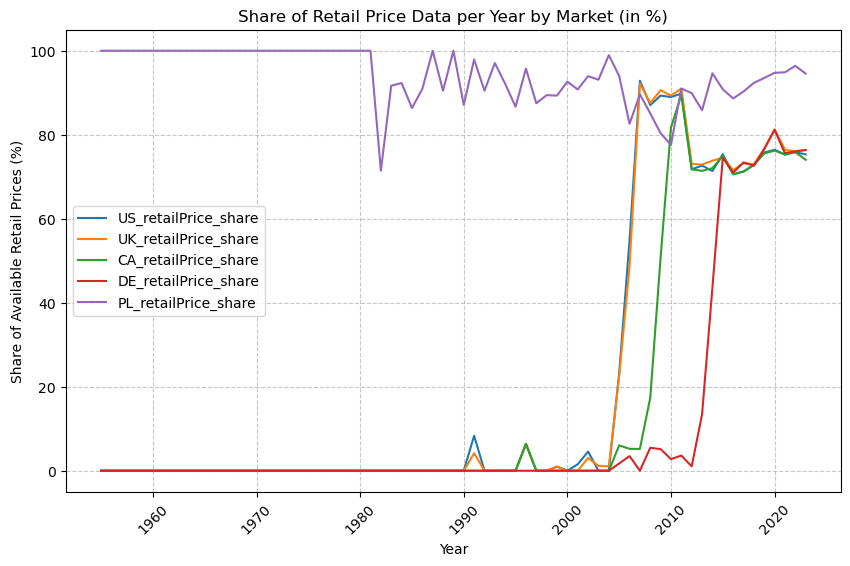

In [27]:
# plot table for better assesment of data
rp_year_share.plot(kind='line', figsize=(10, 6))

plt.title('Share of Retail Price Data per Year by Market (in %)')
plt.xlabel('Year')
plt.ylabel('Share of Available Retail Prices (%)')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)

In [28]:
# filter years where 3 or more markets have at least 70% share of retail prices
rp_period = rp_year_share[
    ((rp_year_share > 0).sum(axis=1) >= 3) & ((rp_year_share >= 70).sum(axis=1) >= 3)
]
rp_period

,US_retailPrice_share,UK_retailPrice_share,CA_retailPrice_share,DE_retailPrice_share,PL_retailPrice_share
year_period,,,,,
2007,92.86,92.21,5.19,0.00,89.61
2008,87.06,87.56,17.41,5.47,85.07
2009,89.32,90.60,50.85,5.13,80.34
2010,88.97,89.31,81.72,2.76,77.59
2011,89.79,90.99,89.49,3.60,90.99
2012,71.76,73.06,71.76,1.04,89.90
2013,72.64,72.89,71.39,13.43,85.82
2014,71.36,73.83,72.04,43.62,94.63
2015,75.37,74.53,74.95,74.53,90.81


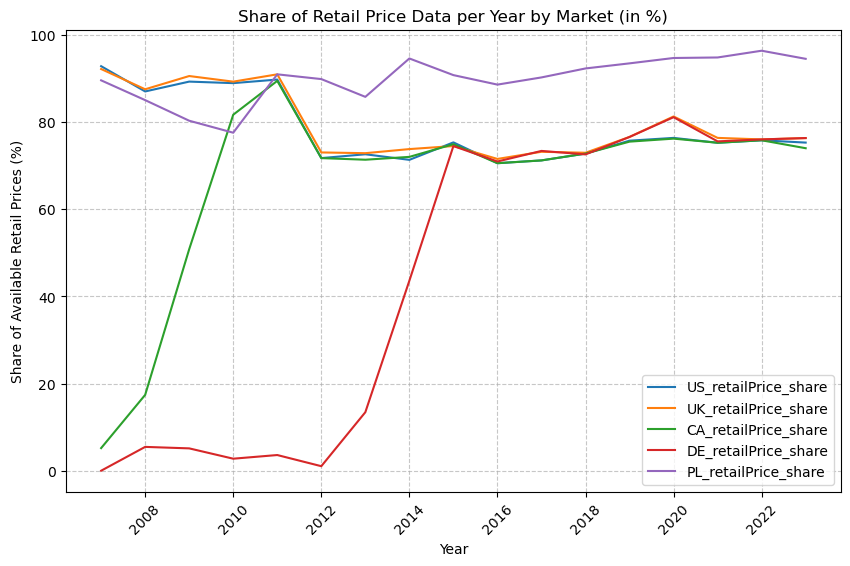

In [29]:
# plot table for better assesment of data
rp_period.plot(kind='line', figsize=(10, 6))

plt.title('Share of Retail Price Data per Year by Market (in %)')
plt.xlabel('Year')
plt.ylabel('Share of Available Retail Prices (%)')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)

In [30]:
# create subset with the chosen time window
# define years of interest
years_of_interest = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# subset the data set 
sub_lego_analysis = df_lego_analysis[df_lego_analysis['year_period'].isin(years_of_interest)]

sub_lego_analysis

,Unnamed: 0,set_number,setID,name,year,theme,themeGroup,subtheme,category,pieces,...,year_time,year_period,inventory_id,set_num,theme_id,num_parts,num_colors,num_materials,sum_spares,franchise_flag
385,385,10309-1,32138,Succulents,2022,Icons,Model making,Botanical Collection,Normal,771.0,...,2022-01-01,2022,133715,10309-1,721.0,771.0,25.0,2.0,148.0,non-franchise
386,386,10297-1,32116,Boutique Hotel,2022,Icons,Model making,Modular Buildings Collection,Normal,3066.0,...,2022-01-01,2022,117586,10297-1,155.0,3068.0,35.0,1.0,716.0,non-franchise
387,387,10306-1,32135,Atari 2600,2022,Icons,Model making,Licensed,Normal,2532.0,...,2022-01-01,2022,143708,10306-1,721.0,2532.0,26.0,2.0,503.0,non-franchise
388,388,10298-1,32127,Vespa 125,2022,Icons,Model making,Vehicles,Normal,1106.0,...,2022-01-01,2022,128311,10298-1,721.0,1107.0,21.0,2.0,384.0,non-franchise
389,389,10298-1,32127,Vespa 125,2022,Icons,Model making,Vehicles,Normal,1106.0,...,2022-01-01,2022,148139,10298-1,721.0,1107.0,21.0,2.0,384.0,non-franchise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4570,4570,5002928-1,24332,Party polybag,2015,Friends,Modern day,Promotional,Extended,16.0,...,2015-01-01,2015,3402,5002928-1,494.0,11.0,6.0,1.0,10.0,non-franchise
4571,4571,4000018-1,24478,Production Kladno Campus 2015,2015,Miscellaneous,Miscellaneous,LEGO internal,Normal,412.0,...,2015-01-01,2015,30413,4000018-1,599.0,412.0,14.0,1.0,65.0,non-franchise
4572,4572,5002938-1,24320,Stormtrooper Sergeant,2015,Star Wars,Licensed,Rebels,Extended,5.0,...,2015-01-01,2015,11658,5002938-1,158.0,6.0,1.0,1.0,1.0,franchise
4573,4573,5002948-1,24814,C-3PO,2015,Star Wars,Licensed,The Force Awakens,Extended,3.0,...,2015-01-01,2015,24143,5002948-1,158.0,3.0,NaN,NaN,NaN,franchise


In [105]:
# normalize retail prices per market to USD and name as per JSON
# get exchange rates in USD
exchange_rates = {
    'US_retailPrice': 1,
    'UK_retailPrice': 1.36,  # 1 GBP = 1.36 USD
    'CA_retailPrice': 0.79,  # 1 CAD = 0.79 USD
    'DE_retailPrice': 1.18,  # 1 EUR = 1.18 USD
    'PL_retailPrice': 0.26   # 1 PLN = 0.26 USD
}

# normalize each market retail price by exchange rates + handling NaNs as 0
sub_lego_analysis.loc[:, 'United States of America'] = (df_lego_analysis['US_retailPrice'].fillna(0) * exchange_rates['US_retailPrice']).round(2)
sub_lego_analysis.loc[:, 'United Kingdom'] = (df_lego_analysis['UK_retailPrice'].fillna(0) * exchange_rates['UK_retailPrice']).round(2)
sub_lego_analysis.loc[:, 'Canada'] = (df_lego_analysis['CA_retailPrice'].fillna(0) * exchange_rates['CA_retailPrice']).round(2)
sub_lego_analysis.loc[:, 'Germany'] = (df_lego_analysis['DE_retailPrice'].fillna(0) * exchange_rates['DE_retailPrice']).round(2)
sub_lego_analysis.loc[:, 'Poland'] = (df_lego_analysis['PL_retailPrice'].fillna(0) * exchange_rates['PL_retailPrice']).round(2)

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [108]:
# check for duplicates
sub_lego_analysis.duplicated().sum()

0

<Axes: xlabel='United States of America', ylabel='Count'>

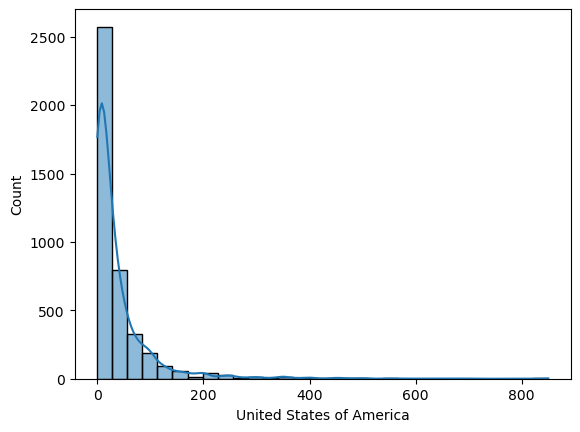

In [109]:
# check for extreme values
sns.histplot(sub_lego_analysis['United States of America'], bins=30, kde = True)

<Axes: xlabel='Canada', ylabel='Count'>

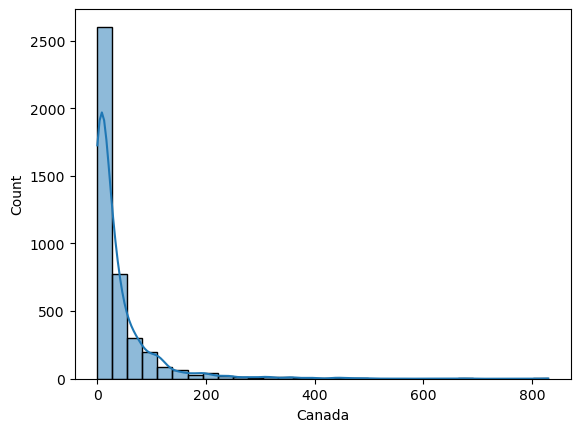

In [110]:
sns.histplot(sub_lego_analysis['Canada'], bins=30, kde = True)

<Axes: xlabel='United Kingdom', ylabel='Count'>

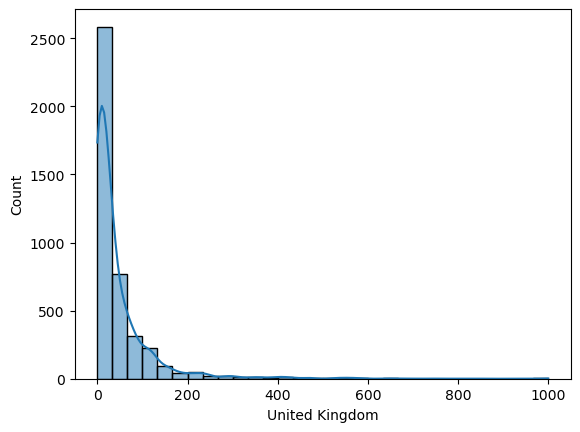

In [111]:
sns.histplot(sub_lego_analysis['United Kingdom'], bins=30, kde = True)

<Axes: xlabel='Germany', ylabel='Count'>

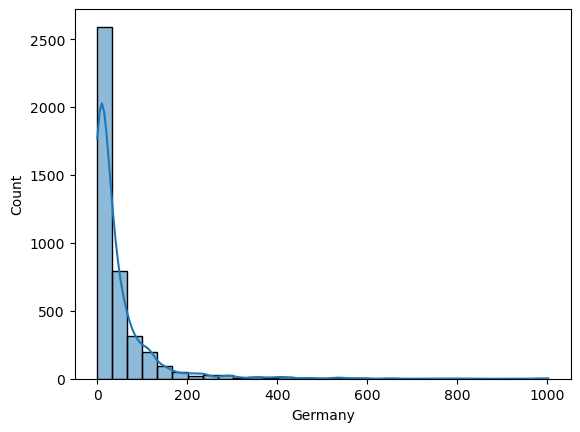

In [112]:
sns.histplot(sub_lego_analysis['Germany'], bins=30, kde = True)

<Axes: xlabel='Poland', ylabel='Count'>

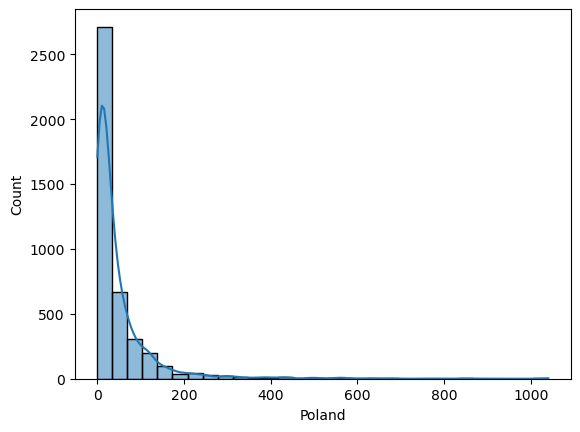

In [113]:
sns.histplot(sub_lego_analysis['Poland'], bins=30, kde = True)

> There are no extreme values in retail prices across the different markets

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **5. GEOSPATIAL ANALYSIS**

**1. How do markets rank by average retail prices in USD for franchise LEGO sets?**

In [118]:
# group by 'franchise_flag' and calculate the mean for each country
sub_lego_analysis.groupby('franchise_flag')[['United States of America', 'United Kingdom', 'Canada', 'Germany', 'Poland']].mean().round(2).reset_index()

,franchise_flag,United States of America,United Kingdom,Canada,Germany,Poland
0,franchise,43.90,54.21,44.10,53.20,55.37
1,non-franchise,34.91,40.76,35.28,39.75,42.73


> - Franchise LEGO sets are more expensive than non-franchise LEGO sets, ranging from 58.38% tot 68.81%, on on average 63.35% 
> - US: 59.82% more expensive, UK: 66.32% more expensive, CA: 58.38% more expensive, DE: 68.81% more expensive, PL: 63.43% more expensive

In [120]:
# rank the markets from most to least expensive average retail prices for franchise LEGO sets only
ranking = sub_lego_analysis[sub_lego_analysis['franchise_flag'] == 'franchise'][['United States of America', 'United Kingdom', 'Canada', 'Germany', 'Poland']].mean().round(2).reset_index()

# rename columns for clarity
ranking.columns = ['market', 'mean_retailPrice']

# add new column with rank score
ranking['score'] = ranking['mean_retailPrice'].rank(ascending=False)

# sort by rank for readability
ranking = ranking.sort_values(by='score')

# show table
ranking

,market,mean_retailPrice,score
4,Poland,55.37,1.0
1,United Kingdom,54.21,2.0
3,Germany,53.20,3.0
2,Canada,44.10,4.0
0,United States of America,43.90,5.0


In [121]:
# setup a folium map 
map = folium.Map(location=[20, -30], zoom_start=1.7, tiles="cartodb positron")

# define manual control markers
fg = folium.FeatureGroup(name="Icon collection", show=True)

# map data
folium.Choropleth(
    geo_data=markets_map,  
    data=ranking,  
    columns=['market', 'score'], 
    key_on='feature.properties.name', 
    fill_color='RdYlGn',
    bins=[1, 2, 3, 4, 5, 6],
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Ranking markets by average retail price for franchise LEGO sets"
).add_to(map)

# add markers with market information to layer Icon collection
folium.Marker(
    location=[51, 19],
    tooltip="PL, rank score 1: $55,37",
    icon=folium.Icon(color="red")
).add_to(fg)

folium.Marker(
    location=[54, -2],
    tooltip="UK, rank score 2: $54,21",
    icon=folium.Icon(color="orange")
).add_to(fg)

folium.Marker(
    location=[51,10],
    tooltip="DE, rank score 3: $53,20",
    icon=folium.Icon(color="beige")
).add_to(fg)

folium.Marker(
    location=[61, -108],
    tooltip="CA, rank score 4: $44,10",
    icon=folium.Icon(color="lightgreen")
).add_to(fg)

folium.Marker(
    location=[35, -99],
    tooltip="USA, rank score 5: $43,90",
    icon=folium.Icon(color="green")
).add_to(fg)

# add layer to map
fg.add_to(map)

# add layer control to map
folium.LayerControl().add_to(map)

# display the map
map

**2. How do localized average retail prices for franchise sets compare to global average retail price for franchise sets?**

In [123]:
# calculate the normalized global mean
global_avg = ranking['mean_retailPrice'].mean().round(2)
global_avg

50.16

In [124]:
ranking

,market,mean_retailPrice,score
4,Poland,55.37,1.0
1,United Kingdom,54.21,2.0
3,Germany,53.20,3.0
2,Canada,44.10,4.0
0,United States of America,43.90,5.0


In [125]:
# calculate % deviation markets vs. global average retail price
ranking['deviation%'] = ((ranking['mean_retailPrice'] - global_avg) / global_avg) * 100
ranking['deviation%'] = ranking['deviation%'].round(2)

# show df 
ranking

,market,mean_retailPrice,score,deviation%
4,Poland,55.37,1.0,10.39
1,United Kingdom,54.21,2.0,8.07
3,Germany,53.20,3.0,6.06
2,Canada,44.10,4.0,-12.08
0,United States of America,43.90,5.0,-12.48


In [126]:
# setup a folium map 
map_dev = folium.Map(location=[50, -30], zoom_start=1.7, tiles="cartodb positron")

# map data
folium.Choropleth(
    geo_data=markets_map,  
    data=ranking,  
    columns=['market', 'deviation%'], 
    key_on='feature.properties.name', 
    fill_color='BrBG',
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Retail pricing variation in for franchise LEGO sets: Market Average vs. Global Average."
).add_to(map_dev)

# define manual control markers
fg_dev = folium.FeatureGroup(name="Market info", show=True)

# add markers with market information to layer Icon collection
folium.Marker(
    location=[51, 19],
    tooltip="Poland: 10% above global average retail price",
    icon=folium.Icon(color="lightgray")
).add_to(fg_dev)

folium.Marker(
    location=[54, -2],
    tooltip="United Kingdom: 8%  above global average retail price",
    icon=folium.Icon(color="lightgray")
).add_to(fg_dev)

folium.Marker(
    location=[51,10],
    tooltip="Germany: 6%  above global average retail price",
    icon=folium.Icon(color="lightgray")
).add_to(fg_dev)

folium.Marker(
    location=[61, -108],
    tooltip="Canada: 12%  below global average retail price",
    icon=folium.Icon(color="lightgray")
).add_to(fg_dev)

folium.Marker(
    location=[35, -99],
    tooltip="USA: 12% below global average retail price",
    icon=folium.Icon(color="lightgray")
).add_to(fg_dev)

# add layer to map
fg_dev.add_to(map_dev)

# add layer control to map
folium.LayerControl().add_to(map_dev)

# display the map
map_dev

**3. How do local market retail prices relate to global market demand?**

In [128]:
# check what 3 themes are most owned 
own = sub_lego_analysis.sort_values(by='ownedBy', ascending=False)

# update df for filtered view
own = own[['ownedBy', 'name', 'set_num', 'theme', 'year_period', 'pieces', 'wantedBy', 'United States of America', 'United Kingdom', 'Canada', 'Germany', 'Poland']].head(10)

# see new df
own

,ownedBy,name,set_num,theme,year_period,pieces,wantedBy,United States of America,United Kingdom,Canada,Germany,Poland
1995,27939.0,Mandalorian Battle Pack,75267-1,Star Wars,2020,102.0,2494,14.99,17.67,15.79,17.69,20.8
3120,26138.0,Assembly Square,10255-1,Creator Expert,2017,4002.0,6971,299.99,353.59,300.19,353.99,377.0
3119,26138.0,Assembly Square,10255-1,Creator Expert,2017,4002.0,6971,299.99,353.59,300.19,353.99,377.0
4120,24751.0,Detective's Office,10246-1,Creator Expert,2015,2262.0,8635,159.99,194.47,157.99,176.99,182.0
4515,24678.0,Rey's Speeder,75099-1,Star Wars,2015,193.0,2685,19.99,27.19,19.74,31.85,31.2
3153,23945.0,NASA Apollo Saturn V,21309-1,Ideas,2017,1969.0,3350,119.99,149.59,118.49,141.59,137.8
3152,23945.0,NASA Apollo Saturn V,21309-1,Ideas,2017,1969.0,3350,119.99,149.59,118.49,141.59,137.8
2008,22535.0,501st Legion Clone Troopers,75280-1,Star Wars,2020,285.0,3462,29.99,33.99,31.59,35.39,36.4
4017,21956.0,Carbon-Freezing Chamber,75137-1,Star Wars,2016,231.0,3345,24.99,27.19,23.69,35.39,33.8
4522,21701.0,Millennium Falcon,75105-1,Star Wars,2015,1329.0,4077,149.99,190.39,142.19,176.99,182.0


In [129]:
# compare market prices in % 
# create collection for markets
markets = ['United States of America', 'United Kingdom', 'Canada', 'Germany', 'Poland']

# calcualte avg price differences per market
own['set_avg'] = own[markets].mean(axis=1).round(2)

# calucate deviation per market
for market in markets:
    own[f'{market}_deviation%'] = ((own[market] - own['set_avg']) / own['set_avg']) * 100
    own[f'{market}_deviation%'] = own[f'{market}_deviation%'].round(2)

# show df
own

,ownedBy,name,set_num,theme,year_period,pieces,wantedBy,United States of America,United Kingdom,Canada,Germany,Poland,set_avg,United States of America_deviation%,United Kingdom_deviation%,Canada_deviation%,Germany_deviation%,Poland_deviation%
1995,27939.0,Mandalorian Battle Pack,75267-1,Star Wars,2020,102.0,2494,14.99,17.67,15.79,17.69,20.8,17.39,-13.80,1.61,-9.20,1.73,19.61
3120,26138.0,Assembly Square,10255-1,Creator Expert,2017,4002.0,6971,299.99,353.59,300.19,353.99,377.0,336.95,-10.97,4.94,-10.91,5.06,11.89
3119,26138.0,Assembly Square,10255-1,Creator Expert,2017,4002.0,6971,299.99,353.59,300.19,353.99,377.0,336.95,-10.97,4.94,-10.91,5.06,11.89
4120,24751.0,Detective's Office,10246-1,Creator Expert,2015,2262.0,8635,159.99,194.47,157.99,176.99,182.0,174.29,-8.20,11.58,-9.35,1.55,4.42
4515,24678.0,Rey's Speeder,75099-1,Star Wars,2015,193.0,2685,19.99,27.19,19.74,31.85,31.2,25.99,-23.09,4.62,-24.05,22.55,20.05
3153,23945.0,NASA Apollo Saturn V,21309-1,Ideas,2017,1969.0,3350,119.99,149.59,118.49,141.59,137.8,133.49,-10.11,12.06,-11.24,6.07,3.23
3152,23945.0,NASA Apollo Saturn V,21309-1,Ideas,2017,1969.0,3350,119.99,149.59,118.49,141.59,137.8,133.49,-10.11,12.06,-11.24,6.07,3.23
2008,22535.0,501st Legion Clone Troopers,75280-1,Star Wars,2020,285.0,3462,29.99,33.99,31.59,35.39,36.4,33.47,-10.40,1.55,-5.62,5.74,8.75
4017,21956.0,Carbon-Freezing Chamber,75137-1,Star Wars,2016,231.0,3345,24.99,27.19,23.69,35.39,33.8,29.01,-13.86,-6.27,-18.34,21.99,16.51
4522,21701.0,Millennium Falcon,75105-1,Star Wars,2015,1329.0,4077,149.99,190.39,142.19,176.99,182.0,168.31,-10.88,13.12,-15.52,5.16,8.13


In [130]:
# set overpricing treshhold to 10% and count the occurances per market

# create container to store result
owned_dev_markets= {}

# loop through all markets
for market in markets:
    owned_dev_markets[market] = (own[f'{market}_deviation%'] > 10).sum()

# convert dictionary to df
pd.DataFrame.from_dict(owned_dev_markets, orient='index', columns=['Count >10% Deviation'])

,Count >10% Deviation
United States of America,0
United Kingdom,4
Canada,0
Germany,2
Poland,5


In [161]:
# setup a folium map 
map_own = folium.Map(location=[50, -40], zoom_start=1.7, tiles="cartodb positron")

# define manual control markers
fg_own = folium.FeatureGroup(name="Count", show=True)

# map data
folium.Choropleth(
    geo_data=markets_map,  
    data=owned_dev_markets,  
    columns=['market', 'Count >10% Deviation%'], 
    key_on='feature.properties.name', 
    fill_color='RdPu',
    fill_opacity=0.6,
    line_opacity=0.2,
    bins=[0, 2, 4, 5, 6],
    legend_name="Count of overprized LEGO sets for the Top 8 most owned LEGO sets"
).add_to(map_own)

folium.Marker(
    location=[51, 19],
    tooltip="Poland: 5 overprized LEGO sets",
    icon=folium.Icon(color="lightgray")
).add_to(fg_own)

folium.Marker(
    location=[54, -2],
    tooltip="United Kingdom: 4 overprized LEGO sets",
    icon=folium.Icon(color="lightgray")
).add_to(fg_own)

folium.Marker(
    location=[51,10],
    tooltip="Germany: 2 out overprized LEGO sets",
    icon=folium.Icon(color="lightgray")
).add_to(fg_own)

# add layer to map
fg_own.add_to(map_own)

# add layer control to map
folium.LayerControl().add_to(map_own)

# display the map
map_own

In [132]:
# check what 3 themes are most wanted
want = sub_lego_analysis.sort_values(by='wantedBy', ascending=False)

# update df for filtered view
want = want[['wantedBy', 'name', 'theme', 'set_num', 'year_period', 'pieces', 'ownedBy', 'United States of America', 'United Kingdom', 'Canada', 'Germany', 'Poland']].head(10)

# see new df
want

,wantedBy,name,theme,set_num,year_period,pieces,ownedBy,United States of America,United Kingdom,Canada,Germany,Poland
3526,8952,Millennium Falcon,Star Wars,75192-1,2017,7541.0,19000.0,849.99,999.59,829.49,1002.99,1040.00
4488,8722,Slave I,Star Wars,75060-1,2015,1996.0,19422.0,199.99,244.79,181.69,235.99,160.29
4120,8635,Detective's Office,Creator Expert,10246-1,2015,2262.0,24751.0,159.99,194.47,157.99,176.99,182.00
3588,8453,Brick Bank,Creator Expert,10251-1,2016,2380.0,20820.0,169.99,176.79,173.79,176.99,169.00
3587,8453,Brick Bank,Creator Expert,10251-1,2016,2380.0,20820.0,169.99,176.79,173.79,176.99,169.00
4038,7391,Death Star,Star Wars,75159-1,2016,4016.0,6605.0,499.99,557.59,473.99,575.12,598.00
3120,6971,Assembly Square,Creator Expert,10255-1,2017,4002.0,26138.0,299.99,353.59,300.19,353.99,377.00
3119,6971,Assembly Square,Creator Expert,10255-1,2017,4002.0,26138.0,299.99,353.59,300.19,353.99,377.00
4512,6732,TIE Fighter,Star Wars,75095-1,2015,1685.0,12223.0,199.99,244.79,181.69,235.99,185.64
3156,6723,Old Fishing Store,Ideas,21310-1,2017,2049.0,14640.0,149.99,190.39,142.19,176.99,182.00


In [133]:
# compare market prices in % 
# create collection for markets
markets = ['United States of America', 'United Kingdom', 'Canada', 'Germany', 'Poland']

# calcualte avg price differences per market
want['set_avg'] = want[markets].mean(axis=1).round(2)

# calucate deviation per market
for market in markets:
    want[f'{market}_deviation%'] = ((want[market] - want['set_avg']) / want['set_avg']) * 100
    want[f'{market}_deviation%'] = want[f'{market}_deviation%'].round(2)

# show df
want

,wantedBy,name,theme,set_num,year_period,pieces,ownedBy,United States of America,United Kingdom,Canada,Germany,Poland,set_avg,United States of America_deviation%,United Kingdom_deviation%,Canada_deviation%,Germany_deviation%,Poland_deviation%
3526,8952,Millennium Falcon,Star Wars,75192-1,2017,7541.0,19000.0,849.99,999.59,829.49,1002.99,1040.00,944.41,-10.00,5.84,-12.17,6.20,10.12
4488,8722,Slave I,Star Wars,75060-1,2015,1996.0,19422.0,199.99,244.79,181.69,235.99,160.29,204.55,-2.23,19.67,-11.18,15.37,-21.64
4120,8635,Detective's Office,Creator Expert,10246-1,2015,2262.0,24751.0,159.99,194.47,157.99,176.99,182.00,174.29,-8.20,11.58,-9.35,1.55,4.42
3588,8453,Brick Bank,Creator Expert,10251-1,2016,2380.0,20820.0,169.99,176.79,173.79,176.99,169.00,173.31,-1.92,2.01,0.28,2.12,-2.49
3587,8453,Brick Bank,Creator Expert,10251-1,2016,2380.0,20820.0,169.99,176.79,173.79,176.99,169.00,173.31,-1.92,2.01,0.28,2.12,-2.49
4038,7391,Death Star,Star Wars,75159-1,2016,4016.0,6605.0,499.99,557.59,473.99,575.12,598.00,540.94,-7.57,3.08,-12.38,6.32,10.55
3120,6971,Assembly Square,Creator Expert,10255-1,2017,4002.0,26138.0,299.99,353.59,300.19,353.99,377.00,336.95,-10.97,4.94,-10.91,5.06,11.89
3119,6971,Assembly Square,Creator Expert,10255-1,2017,4002.0,26138.0,299.99,353.59,300.19,353.99,377.00,336.95,-10.97,4.94,-10.91,5.06,11.89
4512,6732,TIE Fighter,Star Wars,75095-1,2015,1685.0,12223.0,199.99,244.79,181.69,235.99,185.64,209.62,-4.59,16.78,-13.32,12.58,-11.44
3156,6723,Old Fishing Store,Ideas,21310-1,2017,2049.0,14640.0,149.99,190.39,142.19,176.99,182.00,168.31,-10.88,13.12,-15.52,5.16,8.13


In [134]:
# set overpricing treshhold to 10% and count the occurances per market

# create container to store result
wanted_dev_markets= {}

# loop through all markets
for market in markets:
    wanted_dev_markets[market] = (want[f'{market}_deviation%'] > 10).sum()

# convert dictionary to df
pd.DataFrame.from_dict(wanted_dev_markets, orient='index', columns=['Count >10% Deviation'])

,Count >10% Deviation
United States of America,0
United Kingdom,4
Canada,0
Germany,2
Poland,4


In [163]:
# setup a folium map 
map_want = folium.Map(location=[50, -40], zoom_start=1.7, tiles="cartodb positron")

# define manual control markers
fg_want = folium.FeatureGroup(name="Count", show=True)

# map data
folium.Choropleth(
    geo_data=markets_map,  
    data=owned_dev_markets,  
    columns=['market', 'Count >10% Deviation%'], 
    key_on='feature.properties.name', 
    fill_color='Purples',
    fill_opacity=0.6,
    line_opacity=0.2,
    bins=[0, 2, 4, 5, 6],
    legend_name="Count of overprized LEGO sets for the Top 9 most owned LEGO sets"
).add_to(map_want)

folium.Marker(
    location=[51, 19],
    tooltip="Poland: 4 overprized LEGO sets",
    icon=folium.Icon(color="lightgray")
).add_to(fg_want)

folium.Marker(
    location=[54, -2],
    tooltip="United Kingdom: 4 overprized LEGO sets",
    icon=folium.Icon(color="lightgray")
).add_to(fg_want)

folium.Marker(
    location=[51,10],
    tooltip="Germany: 2 overprized LEGO sets",
    icon=folium.Icon(color="lightgray")
).add_to(fg_want)

# add layer to map
fg_own.add_to(map_want)

# add layer control to map
folium.LayerControl().add_to(map_want)

# display the map
map_want

- The most owned and wanted themes are Star Wars, Creator Expert, and Ideas (fan-designed sets). This result highlights the bias in the data, as it primarily reflects adult collectors logging their preferences. However, this can also be interpreted as a segmented outcome, driven by specific fan communities.
- LEGO seems to be more expensive than the global average LEGO set retail prices, with overprizing popular sets (ownedBy/wantedBy).

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **6. RESEARCH FINDINGS**
- About a third of the LEGO themes are movie / TV / video game franchises.
- Franchise LEGO sets are more expensive than non-franchise LEGO sets, on average 63.35% price increase.
- Market ranking avg. retail price (USD) for all franchise sets ordered from highest to lowest: PL, UK, DE, CA, US
- Retail pricing variation for franchise LEGO sets of Market Average vs. Global Average range from +10% to -12%.
- The most owned and wanted themes are Star Wars, Creator Expert, and Ideas (fan-designed sets). This result highlights the bias in the data, as it primarily reflects adult collectors logging their preferences. However, this can also be interpreted as a segmented outcome, driven by specific fan communities.
- LEGO seems to be more expensive than the global average LEGO set retail prices, with overprizing popular sets (ownedBy/wantedBy).

**COVERING RESEARCH QUESTIONS**
- Set availability by region: How do retail prices and availability vary between different regions (US, UK, CA, DE)?
Set availability in markets can't be determined based on missing retail prices, as the sets are still marked as available. I will drop this research question. 

- Most popular themes: Which themes have been the most popular in terms of set releases or sales?
Star Wars, Creator Expert, and Ideas dominate the top 10 most owned and wanted sets. In European markets, they are priced at least 10% higher than the global average retail price. 
 
- Retail price drivers: What factors contribute to higher retail prices (e.g., theme, pieces, licensed status)?
Franchise LEGO sets are driving prices up by around 60% compared to non-licensed sets.